# Diagnosing diabetes
<b>Authors:</b> Lukas Albuszies, Patrick Andersson, Ricardo Mansour

## Introduction

#### Use case: Solving the personnel problem in the healthcare sector

According to the [centers for disease control and prevention](https://www.cdc.gov/diabetes/basics/index.html), diabetes is a chronic health condition that affects how your body turns food into energy. The body breaks down food that is ingested into sugar, which in order to be transported to muscles and organs is released into the blood stream. In order to let the sugar leave the blood stream and enter cells to be used as energy, it requires insulin as a key. Diabetes causes either a low amount of insulin or a limited functionality of it. If the sugar cannot leave the blood stream when it is supposed to, it stays there for too long and can cause serious health problems.

A problem that exists in healthcare is low personnel, so the aim is to use the available doctors as efficiently as possible, because if there are ways that save a doctor time during the day, he may be able to help more patients. Our aim is to create a classifier that can classify large sets of patient data into patients with a high chance of diabetes, and those with a low chance of it. This way patients at a higher risk can be further examined first, and therefore be treated more quickly if they do have the disease. Patients with a low risk can be put off and more urgent treatments can be made.

The target users are doctors, and the model would benefit from a downstream analysis that discusses the consequences of falsely classified patients who as a result receive treatment at a later time.

#### The Dataset

We found a dataset on [kaggle.com](https://www.kaggle.com) from the [National Institute of Diabetes and Digestive and Kidney Diseases](https://www.niddk.nih.gov) that contains several physiological parameters of patients such as their body mass index and the insulin level in their blood. 

The data was collected for females with Pima Indian heritage, which are a group of Native Americans living in the area that is made up of what is now central and southern Arizona. This specific group of people was chosen because it was discovered that because of their forefathers low sugar diet they were genetically unprepared to process the large amounts of sugar in the American and Mexican diets, and therefore at a high risk of obesity and diabetes. A constraint on the data set is that the patients are all female and at least 21 years of age. Despite these constraints, for our investigation this data is adequate, as a large portion of the patients have diabetes. For a serious attempt at implementing this idea into hospitals, a more thorough data collection would have to take place.

There may be discrepancies between this group of patients from a very distinct heritage to patients with a different heritage, and so if the data scope could be increased, improvements would be to include males, ages below 21, and people from many different heritages.

Some data privacy consideration to take into account is that patient data must always be protected, this however is handled by hospitals on an administrative level. Ethical considerations include the issue that some people if falsely classified may receive treatment at a later time.

We take a good prediction to be any prediction that improves our judgement. Based on this, a resulting prediction of higher than 50% would help judge whether a patient is at a higher risk of diabetes or not.

The statistical data types are: 

| Variable | Data type | Measurement | Range | 
|--- |--- |--- |--- | 
| Pregnancies | Discrete numerical | Count of pregnancies | 0 - 17 | 
| Glucose | Continuous numerical | mg/dL | 44 - 199 | 
| BloodPressure | Continuous numerical | mmHg | 24 - 122 | 
| SkinThickness | Continuous numerical | Triceps skin fold (TSF) thickness to the nearest millimeter | 7 - 99 | 
| Insulin | Continuous numerical |  U/ml | 14 - 846 | 
| BMI | Continuous numerical | kg/m  | 18.2 - 67.1 | 
| DiabetesPedigreeFunction | Continuous numerical | Function of heritage | 0.078 - 2.42 | 
| Age | Continuous numerical | Age in years | 21 - 81 | 
| Outcome | Nominal categorical | Diabetes diagnosis or not | {0 , 1} |

The input vector constists of the eight first variables and the target is Outcome. We will split the dataset into one training-and-validation set and one test-set once we have explored the data and cleaned it from missing values.

## Project set-up
Importing modules, importing data to pandas data frame.

In [80]:
# data and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# handle zip file
import zipfile

# stats
from scipy.stats import stats

In [81]:
# hardcoded variables
filename_zip = 'archive.zip'
filename_csv = 'diabetes.csv'
data_folder = 'data'

# theme setting for seaborn
sns.set_theme()

In [82]:
with zipfile.ZipFile(data_folder + '/' + filename_zip) as archive:
    archive.extractall(data_folder)

In [83]:
# original df
og_df = pd.read_csv(data_folder + '/' + filename_csv)
og_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


## Explore and clean data

In [6]:
display(og_df.describe(), og_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


None

There are no null-values, there are however `0`-values where there shouldn't be any. Perhaps the zero replaces null?

In [7]:
display(og_df.loc[og_df.Glucose == 0])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


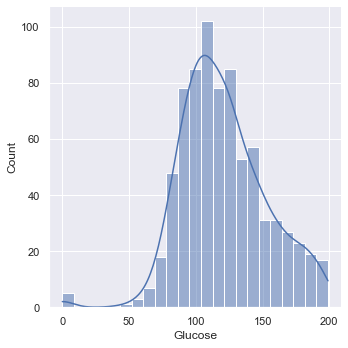

In [8]:
sns.set_theme()

sns.displot(og_df, x='Glucose', kde=True)
plt.show()

After seeing above distribution and after brief research we assume that 0 glucose is considered a missing value. Converting the values to NaN for this column. Since we are making changes we are also making a copy of the df that we will continue to work with.

In [84]:
df = og_df.copy()

df.Glucose = df.Glucose.replace(0, np.nan)

In [85]:
display(df.describe(), "Number of NaN in the glucose column: ", df.Glucose.isnull().values.sum() )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.69,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,30.54,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,44.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,141.00,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


'Number of NaN in the glucose column: '

5

The mean of the Glucose column shifted upwards after replacing zeros, and the minimum is now a more reasonable 44. We will do the same cleanup for all variables where a zero isn't a reasonable value.

To check all variables if a zero value seems reasonable we will visualize histograms for all of them.

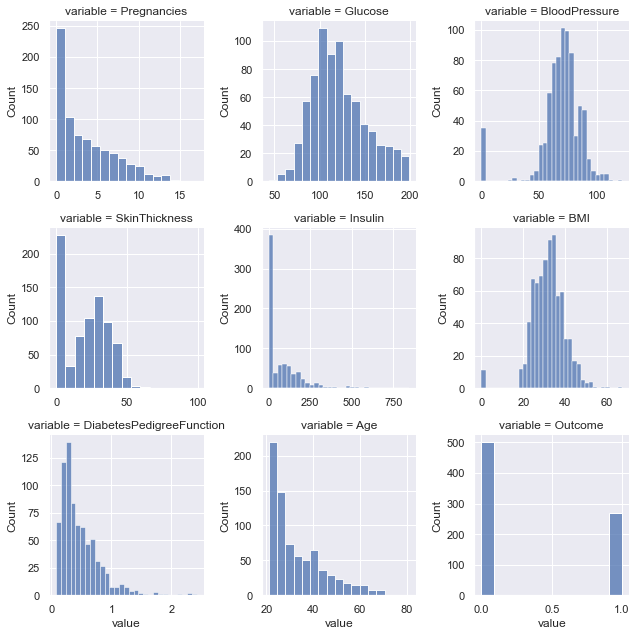

In [11]:
def all_vars_hists(df):
    # melt variables 
    df_melted = df.melt(var_name='variable')
    grid = sns.FacetGrid(df_melted, col='variable', col_wrap=3, sharex=False, sharey=False)
    grid.map(sns.histplot, 'value')
    plt.show()

all_vars_hists(df)

The `Pregnancies`-data is hard to interpret. It is completely reasonable that a woman has had zero pregnancies, but for certain some of those zeros are also really NULL-values.

Else we can with confidence replace all `0`-values in the following columns: `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`.

In [88]:
zero_to_nan_cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in zero_to_nan_cols:
    df[col].replace(0, np.nan, inplace=True)

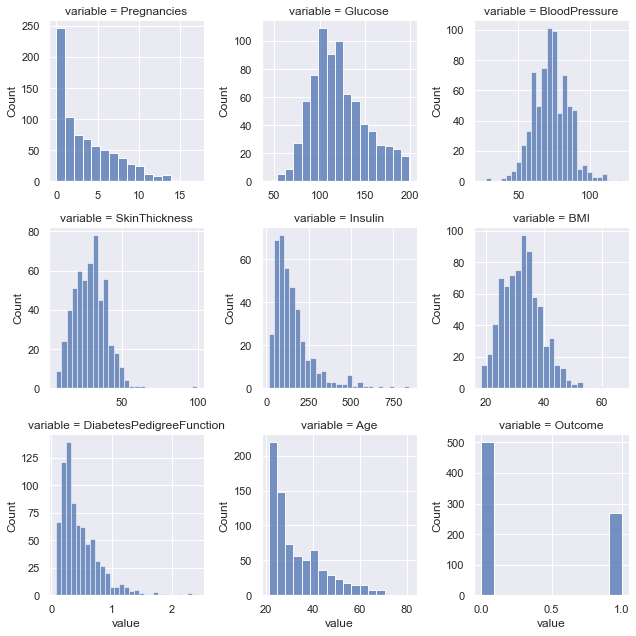

In [13]:
all_vars_hists(df)

Now that the variables are cleaned from confusing zeros, we can again look at the descriptives to get a more accurate view of means and minimum values.

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


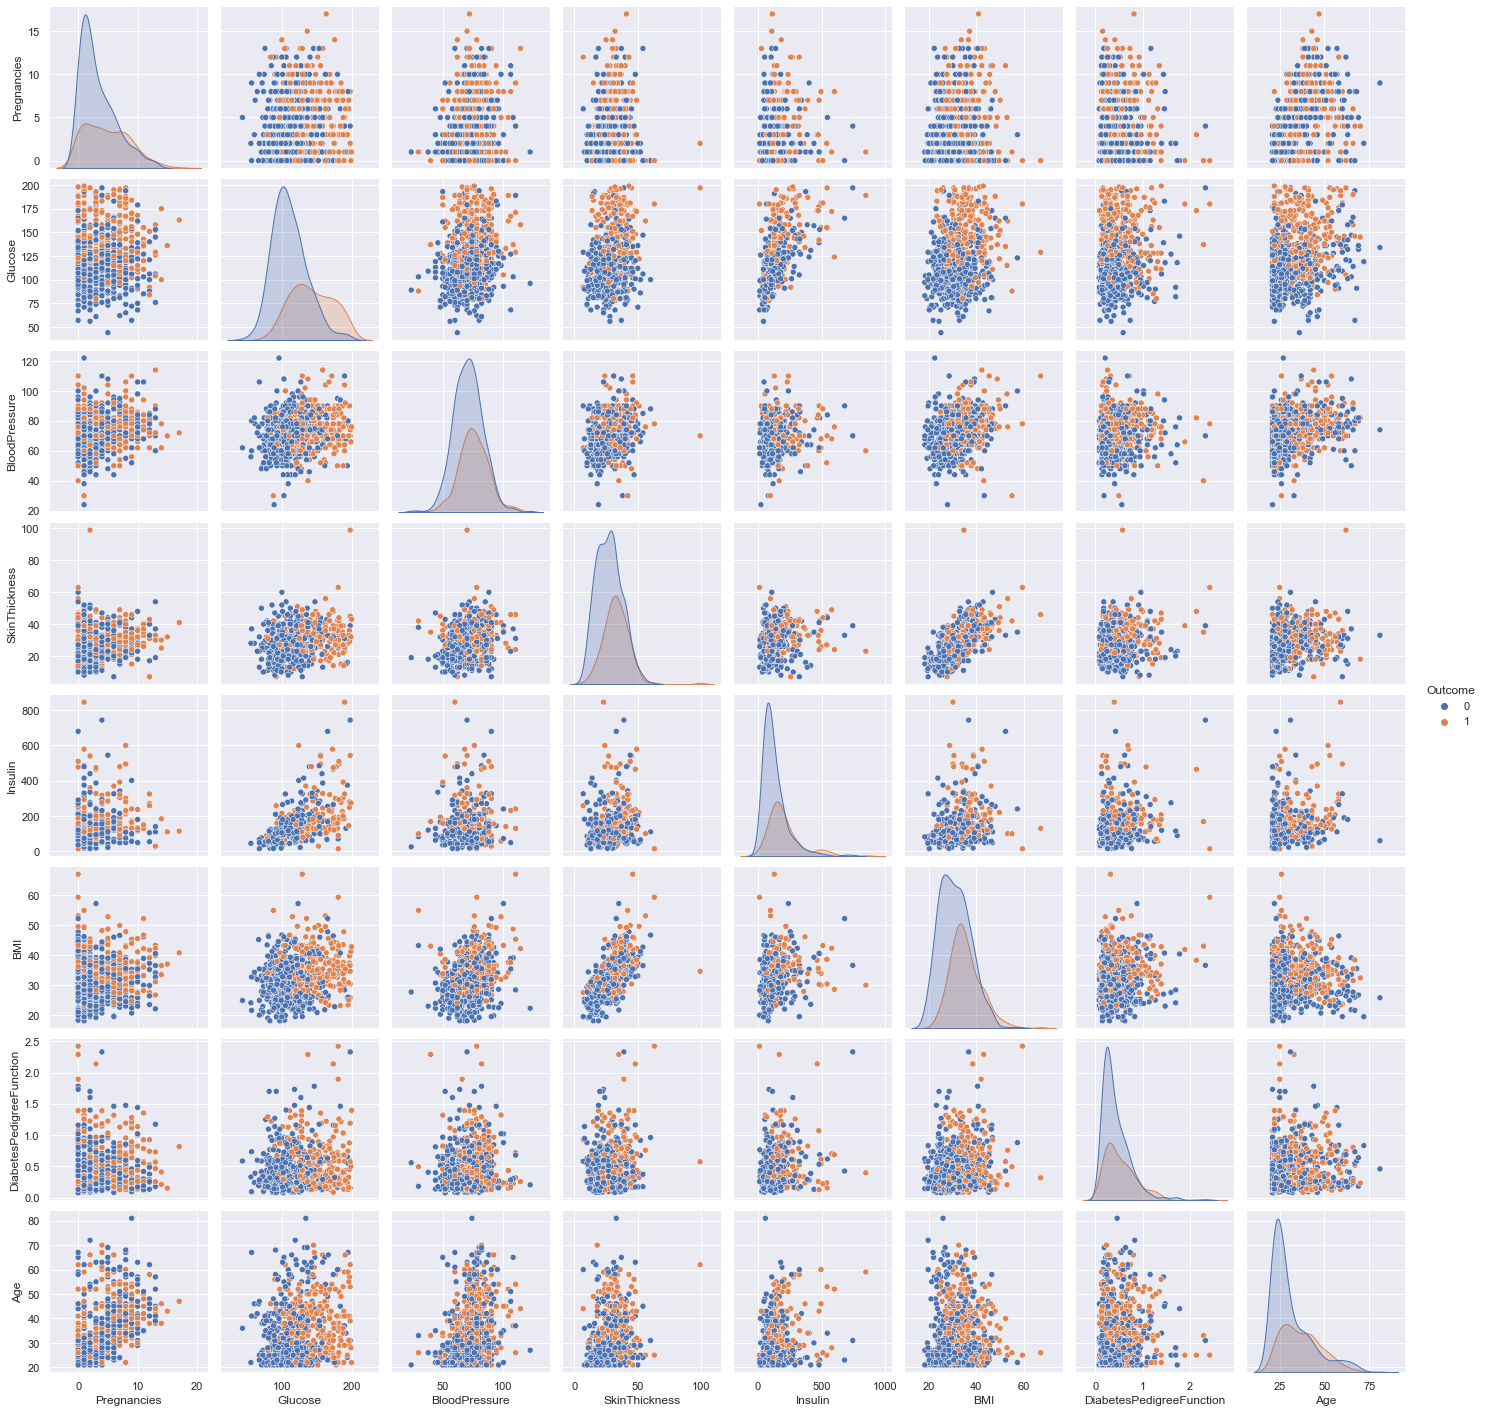

In [15]:
sns.pairplot(df, hue='Outcome', dropna=True)

Glucose seems to be the variable that best separates the classes on its own, since the KDEs for the classes are partly separated. We can also note that the classes seem to cluster when Glucose is plotted against another variable.

We also note that SkinThickness and BMI seem to correlate linearly, also Glucose and Insulin seems to follow a distribution rather than a blob, and Age seems to have a slight correlation with BloodPressure, which makes sense.

Finally we will look at how much data we are missing.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Glucose has the five missing values we took care of first, and BloodPressure and BMI are missing some dozens, and SkinThickness is missing about a third, and most notably we are missing almost half of the values in the Insulin-column. We will explore and describe the data as it is before deciding how to handle the missing values.

## Descriptive analysis

### Covariance and correlation

We will begin by looking at any dependencies between the available variables.

In [86]:
# normalize before covariance analysis
df_normal = (df-df.min())/(df.max()-df.min())
df_normal.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.23,0.50,0.57,0.21,0.09,0.48,0.17,0.20,0.35
std,0.20,0.20,0.16,0.16,0.14,0.12,0.14,0.20,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.06,0.35,0.51,0.00,0.00,0.41,0.07,0.05,0.00
50%,0.18,0.47,0.59,0.23,0.04,0.48,0.13,0.13,0.00
75%,0.35,0.63,0.66,0.32,0.15,0.55,0.23,0.33,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


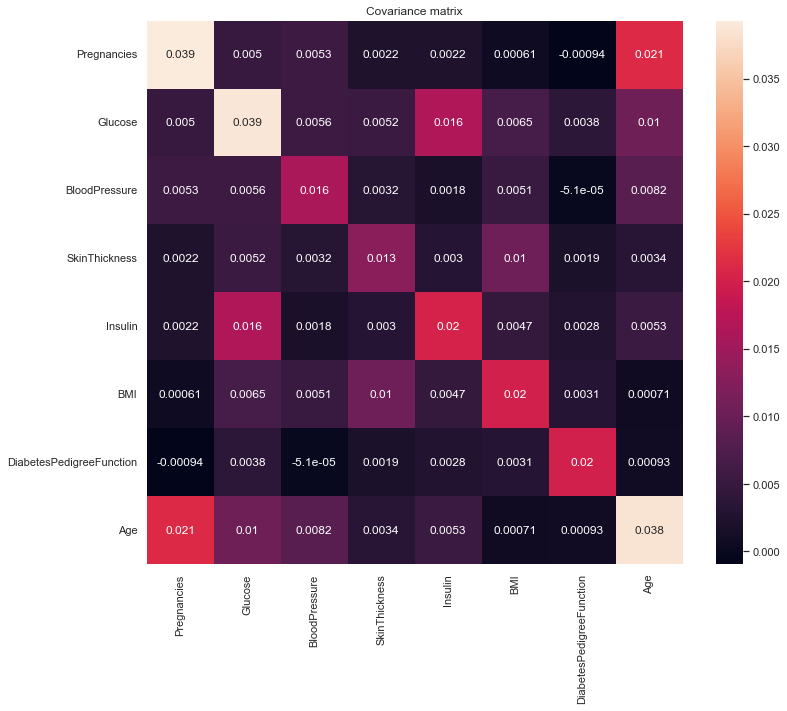

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df_normal.drop('Outcome', axis=1).cov(), annot=True)
plt.title('Covariance matrix')
plt.show()

From the above covariance matrix we see that most variables covary positively with each other. The only negative covariances are between DiabetesPedigreeFunction (DPF) and Pregnancies and BloodPressure.

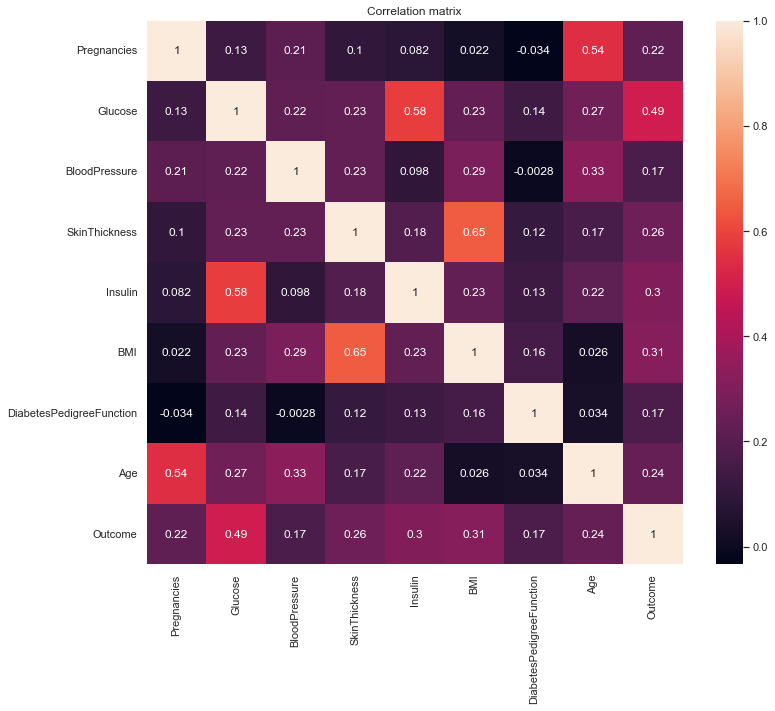

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation matrix')
plt.show()

From the correlation heatmap above we can see that the only strong correlations between variables are between BMI and SkinThickness, between Insulin and Glucose, and between Age and Pregnancies. As previously predicted, Glucose is the feature that correlates the most with the outcome. After Glucose, it is BMI, Insulin and SkinThickness that have the highest correlations with the outcome, so those are the variables that we will go forward with in our descriptive analysis.

But first, let's take a closer look at the correlation between the mentioned variables.

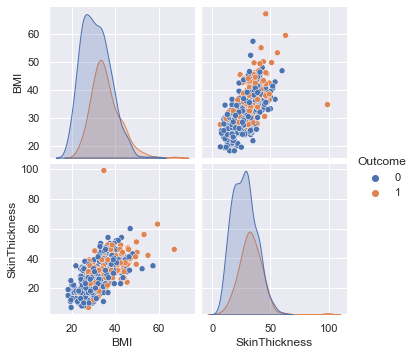

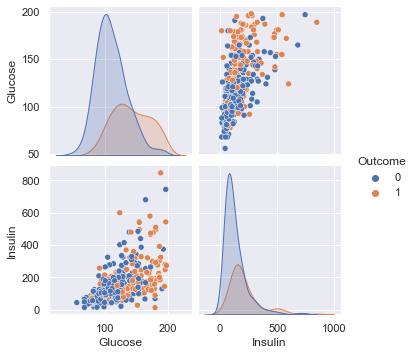

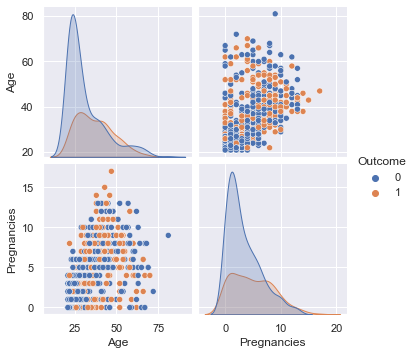

In [78]:
sns.pairplot(data=df, vars=['BMI', 'SkinThickness'], hue='Outcome')
plt.show()

sns.pairplot(data=df, vars=['Glucose', 'Insulin'], hue='Outcome')
plt.show()

sns.pairplot(data=df, vars=['Age', 'Pregnancies'], hue='Outcome')
plt.show()

We can clearly see the strong correlation in first two variable-pairs, and one data point really stands out as an outlier: the maximum value in SkinThickness and in BMI. We will handle it when we see it again when exploring the individual variables.

The strong correlation indicates dependence, and medically it makes sense. BMI and TSF thickness are both a score of amount of body fat, and Insulin is a hormone that reacts to glucose concentration levels. The number of pregnancies correlates positively with age, of course. The pregnancies-data is, again, not very accurate since a certain portion of missing values are labeled has having had zero pregnancies.

### Glucose
Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test. According to American Diabetes Association's Standards of Medical Care in Diabetes[1], a plasma glucose concentration above 140 mg/dL and below 200 mg/dL after two hours of administering the oral glucose indicates impaired glucose tolerance and a concentration above 200 confirms a diabetes diagnosis.

In [22]:
df.Glucose.describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

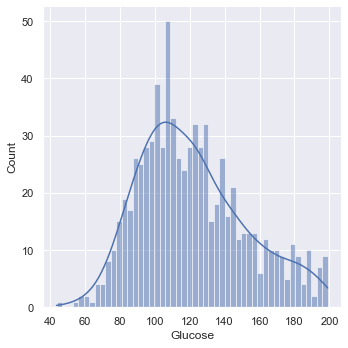

In [79]:
sns.displot(df.Glucose, bins=50, kde=True)
plt.show()

There are no data points with a concentration above 199, such points would on their own confirm a diabetes diagnosis. The distribution seems to at first follow a Gaussian distribution but with a "bump" on the positive side, indicating perhaps a chi-squared distribution. There does seem to be a artificial cutoff in the data at a glucose level of 200, we do not know how many instances there are above that level or how fast it approaches zero.

The "bump" can be explained by the fact that the sample is selected based on a genetic heritage that supposedly is not well-equipped to handle the high levels of sugar and fat in the American diet, a higher level of not managed glucose is perhaps even expected.

That bump, especially, seems also to correlate to the outcome of being diagnosed with diabetes, as seen when we separate the KDE on wether the outcome is a diagnosis or not, below.

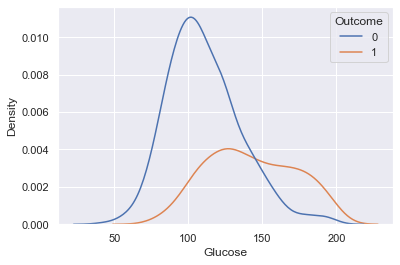

In [24]:
sns.kdeplot(data=df, x='Glucose', hue='Outcome')
plt.show()

The KDE-plot above also supports the statements from the American Diabetes Association, showing that the likelihood of being diagnosed with diabetes is higher above concentration levels of 140 mg/dL. 

### BMI
BMI, or body mass index, is a measure of how a person's weight relates to their height. A higher score means that a person is heavier in relation to their height. The formula is $BMI = \frac{weight(kg)}{height(m)^2}$

In [25]:
df.BMI.describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

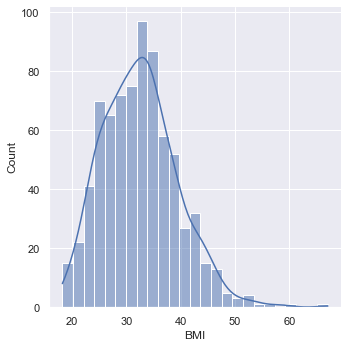

In [26]:
sns.displot(df, x='BMI', kde=True)
plt.show()

The distribution of BMI looks somewhat normally distributed, but the drop-off is steep as BMI passes 35 and there are a number of outliers on the positive side. This could be due to the nature of the variable, very high BMI are much less common. There are no values below 18.

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

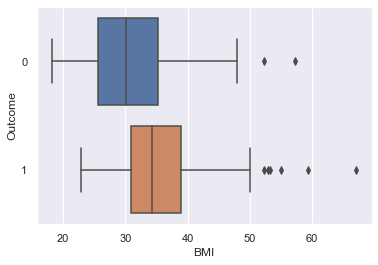

In [27]:
sns.boxplot(data=df, x='BMI', y='Outcome', orient='h')

The above boxplots indicate that a higher BMI correlate with a higher chance of being diagnosed with diabetes.

From the quantiles and mean and median above, we can see that this population sample is generally overweight, where only the first quartile has a healthy weight. This, again, makes sense because of the sample selection criteria.  

CDC gives four simplified categories based on BMI:
| BMI | Category |
| --- | --- |
|Below 18.5|Underweight|
|18.5 – 24.9|Healthy Weight|
|25.0 – 29.9|Overweight|
|30.0 and Above|Obesity|

### Insulin
2-Hour serum insulin (mu U/ml). This is the level of insulin in the blood two hours after glucose administration. Normal levels seem to be up to 166 units according to a few different sources, higher levels indicate some form of diabetes.

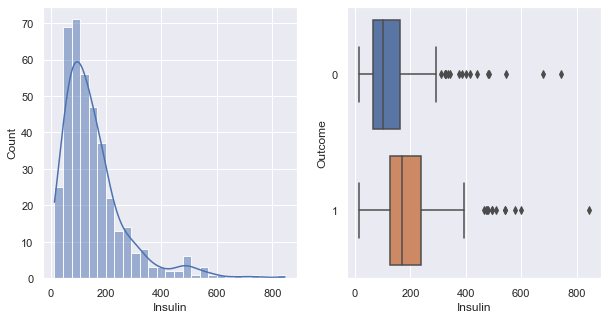

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df, x='Insulin', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Insulin', y='Outcome', orient='h')
plt.show()


This distribution looks more like a lognormal distribution, with a sharp peak early and a long tail. This indicates that the natural logarithm of the values will follow a normal distribution. The highest values seem really high, but without further medical knowledge we cannot conclude anything about these data points. The box plot shows that each quantile and the median are higher for those diagnosed with diabetes, indicating that higher levels of insulin correlate with higher chance of being diagnosed with the disease.

In [29]:
print("Ratio of patients that are diagnosed with diabetes out of all patients with a level below 166: ", end='')
print(df[df.Insulin < 166]['Outcome'].value_counts()[1], '/', df[df.Insulin < 166]['Outcome'].value_counts().sum())

print("Ratio of patients that are diagnosed with diabetes out of all patients with a level above 166: ", end='')
print(df[df.Insulin > 166]['Outcome'].value_counts()[0], '/', df[df.Insulin > 166]['Outcome'].value_counts().sum())

print("Ratio of patients that are diagnosed with diabetes out of all patients with a level above 400: ", end='')
print(df[df.Insulin > 400]['Outcome'].value_counts()[0], '/', df[df.Insulin > 400]['Outcome'].value_counts().sum())

Ratio of patients that are diagnosed with diabetes out of all patients with a level below 166: 61 / 261
Ratio of patients that are diagnosed with diabetes out of all patients with a level above 166: 63 / 132
Ratio of patients that are diagnosed with diabetes out of all patients with a level above 400: 8 / 20


We can see that the ratio of diabetes diagnoses increases with the level of insulin.

### SkinThickness
Triceps skin fold (TSF) thickness to the nearest millimeter is a measure of fat reserves in the body. Women have generally a higher TSF thickness than men, in a study with 25,954 participants [2] the women had an average TSF thickness of 23.6 ± 7.5 mm and the men had an average TSF thickness of 14.3 ± 6.8 mm. The data in this dataset is all women, with a mean of 29.15 mm and a standard deviation of 10.48 mm. The range is from 7 mm to 99 mm. 

In [30]:
df.SkinThickness.describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

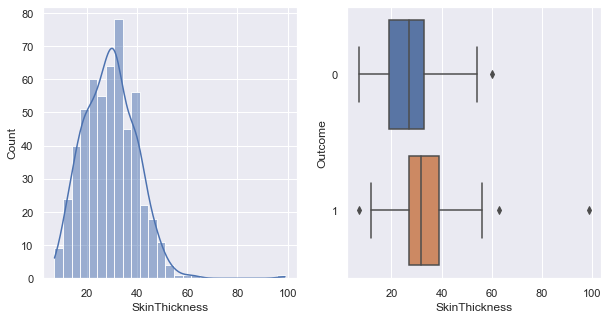

In [31]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.histplot(df, x='SkinThickness', kde=True)

plt.subplot(122)
sns.boxplot(data=df, x='SkinThickness', y='Outcome', orient='h')

plt.show()

The distribution of TSF thickness-data is somewhat normal, however with bumps on each side of the center and quite a sharp peak. The boxplots indicate that greater TSF thickness increases likelihood of being diagnosed with diabetes.

In [32]:
df[df.SkinThickness == 99]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1


Looking at the histogram and the boxplots, the TSF thickness value of 99 can seem like an outlier, perhaps even an error. 

In [33]:
df[(df.SkinThickness != 99) & (df.SkinThickness.notna())].SkinThickness.sort_values().tail()

86     54.0
211    54.0
120    56.0
57     60.0
445    63.0
Name: SkinThickness, dtype: float64

The highest SkinThickness excluding 99 is 63mm, and in for example this article https://www.frontiersin.org/articles/10.3389/fcvm.2022.858994/full a tool that measures accurately up to a maximum of 45mm was used. So we conclude that this measurement is an outlier and as such we replace it with a null value for later handling. 

In [34]:
df.SkinThickness.replace(99, np.nan, inplace=True)
df[df.SkinThickness.notna()].SkinThickness.sort_values().tail()

86     54.0
211    54.0
120    56.0
57     60.0
445    63.0
Name: SkinThickness, dtype: float64

## Handling missing values

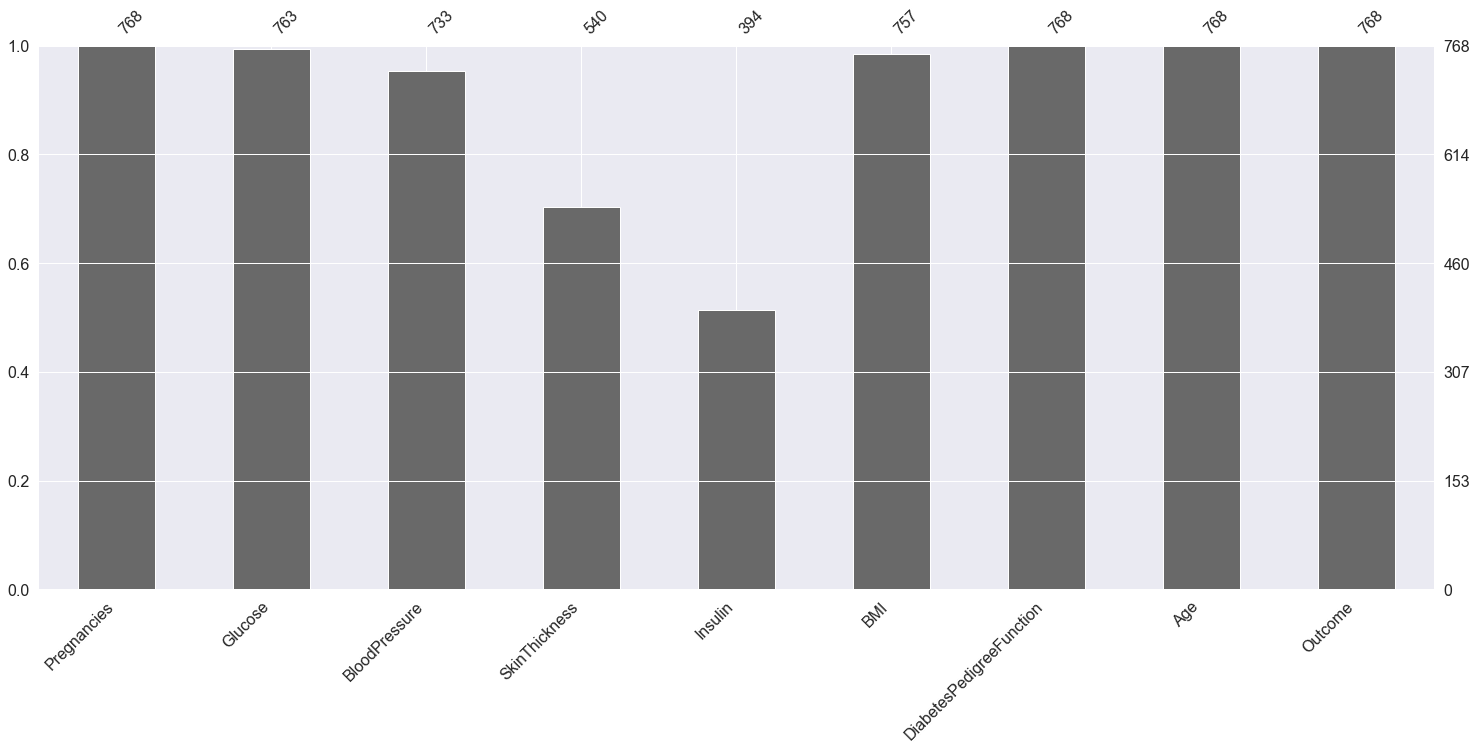

In [36]:
import missingno as msno

msno.bar(df)
plt.show()

Above we see how much data is missing from each variable. We will try to fill the missing values using a K-nearest-neighbor algorithm from the sklearn library called KNNImputer. It calculates a distance between data points and imputes the average of the closest K neighbors.

In [89]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
knn_imputed_data = knn_imputer.fit_transform(df)
df_na_filled = pd.DataFrame(knn_imputed_data, columns=df.columns)
df_na_filled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.59,72.35,29.14,154.90,32.43,0.47,33.24,0.35
std,3.37,30.56,12.28,9.77,105.11,6.89,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,84.00,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,129.00,32.05,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,193.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


This looks more reasonable. We will compare the distribution before and after imputing the missing values. 

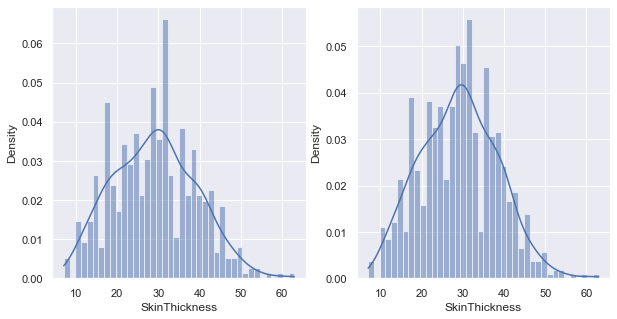

In [41]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df, x='SkinThickness', kde=True, stat='density', bins=40)

plt.subplot(1,2,2)
sns.histplot(df_na_filled, x='SkinThickness', kde=True, stat='density', bins=40)

plt.show()

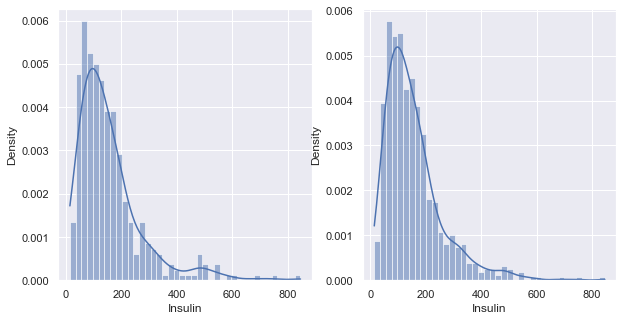

In [42]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df, x='Insulin', kde=True, stat='density', bins=40)

plt.subplot(1,2,2)
sns.histplot(df_na_filled, x='Insulin', kde=True, stat='density', bins=40)

plt.show()

Both variables that had many missing values have very similar distribution before and after filling the missing values with the average of the two nearest neighbors.

## Probability distributions

In order to describe the variables, we can use probability distributions. A probability distribution is a function that describes the likelihood of different outcomes in a random event. For example, we can use a normal distribution to describe the distribution of BMI levels in the dataset. The normal distribution is a continuous probability distribution with a bell-shaped curve, characterized by its mean and standard deviation. The mean represents the center of the distribution, while the standard deviation represents the spread of the distribution.

We can also use a log-normal distribution to describe the distribution of Insulin and Glucose. The log-normal distribution is a continuous probability distribution that is derived from the normal distribution, but it is applied to data that has been log transformed. This is useful when the data is skewed, as it can help to normalize the distribution.

These probability distributions are interesting to look at because they can provide insight into the underlying patterns and trends in the data. For example, we can use the mean and standard deviation of the normal distribution to predict the likelihood of certain outcomes, such as the probability of a patient having high BMI levels. Similarly, we can use the parameters of the log-normal distribution to predict the likelihood of certain outcomes for Insulin and BMI. By understanding these patterns and trends, we can make more informed decisions about how to analyze and interpret the data.

Probability distributions are mathematical functions that explain the probability of various outcomes in a random occurrence. To work with probability distributions in Python. Maximum likelihood estimation (MLE) is a method for estimating the parameters of a statistical model. Given a set of data and a statistical model, MLE finds the values of the parameters that maximize the likelihood function, which is a function that describes the probability of observing the data given the parameters of the model.The parameters of the statistical models being fit to the variables Glucose, BMI, and Age are the parameters that are being estimated using MLE. For example, in the case of the normal distribution, the parameters being estimated are the mean and standard deviation of the distribution. For the uniform distribution, the parameters being estimated are the minimum and maximum values of the distribution. And for the exponential distribution, the parameter being estimated is the scale parameter.


Here's an example of how probability distributions can be used to describe three different variables:


### Get the parameters using MLE

In [54]:
import scipy.stats as stats
import pandas as pd


#Remove non-finite values from the data frame
df = df.dropna()
df = df[np.isfinite(df)]

#Extract the variables of interest
var1 = df['Insulin'].values
var2 = df['Glucose'].values
var3 = df['BMI'].values

#Estimate the parameters of the normal distribution for each variable using MLE
mu1, std1 = stats.norm.fit(var1)
mu2, std2 = stats.norm.fit(var2)
mu3, std3 = stats.norm.fit(var3)

# Estimate the parameters of the log-normal distribution for each variable using MLE
s1, loc1, scale1 = stats.lognorm.fit(var1)
s2, loc2, scale2 = stats.lognorm.fit(var2)
s3, loc3, scale3 = stats.lognorm.fit(var3)

print("Estimated shape parameter for Insulin:", s1)
print("Estimated location parameter for Insulin:", loc1)
print("Estimated scale parameter for Insulin:", scale1)
print("Estimated shape parameter for Glucose:", s2)
print("Estimated location parameter for Glucose:", loc2)
print("Estimated scale parameter for Glucose:", scale2)
print("Estimated shape parameter for BMI:", s3)
print("Estimated location parameter for BMI:", loc3)
print("Estimated scale parameter for BMI:", scale3)

print("Estimated mean for Insulin:", mu1)
print("Estimated standard deviation for Insulin:", std1)
print("Estimated mean for Glucose:", mu2)
print("Estimated standard deviation for Glucose:", std2)
print("Estimated mean for BMI:", mu3)
print("Estimated standard deviation for BMI:", std3)



Estimated shape parameter for Insulin: 3.13973467413075
Estimated location parameter for Insulin: 13.999951944567695
Estimated scale parameter for Insulin: 0.921706529185119
Estimated shape parameter for Glucose: 0.2882150128249352
Estimated location parameter for Glucose: 15.508802551556975
Estimated scale parameter for Glucose: 102.7980177476021
Estimated shape parameter for BMI: 0.1767492734963052
Estimated location parameter for BMI: -6.178504149145084
Estimated scale parameter for BMI: 38.65551901658246
Estimated mean for Insulin: 156.05612244897958
Estimated standard deviation for Insulin: 118.69000917870952
Estimated mean for Glucose: 122.62755102040816
Estimated standard deviation for Glucose: 30.821392254943824
Estimated mean for BMI: 33.08622448979592
Estimated standard deviation for BMI: 7.018689629330367


The number of parameters being estimated depends on the specific statistical model being used. In the case of the normal distribution, two parameters (mean and standard deviation) are being estimated. The parameters that you have estimated for the different probability distributions can give you some information about the underlying data that you are modeling. For example, if you are modeling the Glucose level of a population, the mean and standard deviation of the normal distribution that you fit can give you an idea of the average Glucose level and the spread of the data. The same can be said about the two other variables. 

The lognormal distribution is a distribution of a random variable whose logarithm is normally distributed. This means that the variable itself is distributed in a skewed manner, with more values clustering around the mean and fewer values in the tails. It is often used to model variables that are positively skewed and whose values are constrained to be positive (e.g. prices, sizes).

In the case of insulin and glucose levels, it may be appropriate to use the lognormal distribution if the data is positively skewed and the values are strictly positive. This would allow you to model the distribution of these variables more accurately, as the normal distribution may not be an appropriate fit for skewed data.

The function returns the shape, location, and scale parameters of the log-normal distribution, rather than the mean and standard deviation.These parameters can be used to calculate the mean and standard deviation of the original data if desired.



### Q-Qplot 

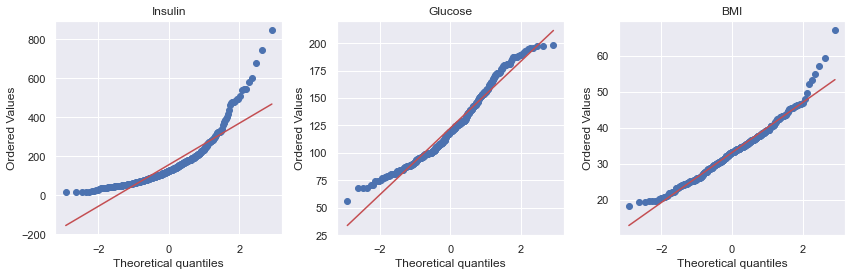

In [56]:
#Generate a Q-Q plot for each variable
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
stats.probplot(var1, dist="norm", plot=plt)
plt.title("Insulin")

plt.subplot(1, 3, 2)
stats.probplot(var2, dist="norm", plot=plt)
plt.title("Glucose")

plt.subplot(1, 3, 3)
stats.probplot(var3, dist="norm", plot=plt)
plt.title("BMI")

plt.tight_layout()
plt.show()


Looking at the 3 Q-Qplots we can see that BMI is the only one following the line of normal distribution, it means that for both Insulin and Glucose another type of distribution is needed.

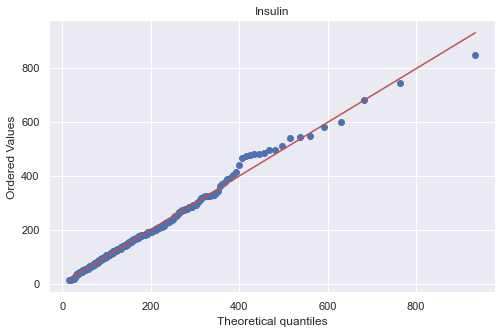

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, probplot

# Extract the Insulin variable
insulin = df['Insulin'].values

# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(insulin, floc=0)

# Create the Q-Q plot
fig, ax = plt.subplots(figsize=(8, 5))
probplot(insulin, dist=lognorm, sparams=(shape, loc, scale), plot=ax)
plt.title("Insulin")
plt.show()

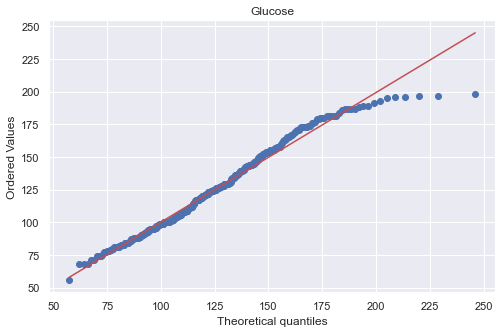

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, probplot

# Extract the Insulin variable
insulin = df['Glucose'].values

# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(insulin, floc=0)

# Create the Q-Q plot
fig, ax = plt.subplots(figsize=(8, 5))
probplot(insulin, dist=lognorm, sparams=(shape, loc, scale), plot=ax)
plt.title("Glucose")
plt.show()

In the context of the log-normal distribution, the parameter mu is the mean of the natural logarithm of the data, and sigma is the standard deviation of the natural logarithm of the data. These parameters can be used to describe the shape and location of the log-normal distribution. For example, a larger value of mu will shift the distribution to the right, while a larger value of sigma will make the distribution more spread out.

### Using the MLE to get the PDFs  for the three different variables

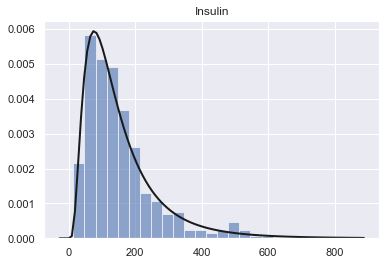

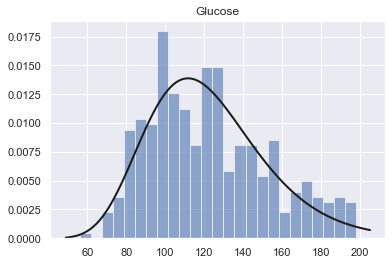

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Extract the Insulin and Glucose data
insulin = df['Insulin'].values
glucose = df['Glucose'].values

# Fit a log-normal distribution to the Insulin data using MLE
insulin_shape, insulin_loc, insulin_scale = lognorm.fit(insulin, floc=0)

# Fit a log-normal distribution to the Glucose data using MLE
glucose_shape, glucose_loc, glucose_scale = lognorm.fit(glucose, floc=0)

# Plot the histogram and the PDF of the fitted log-normal distribution for Insulin
plt.hist(insulin, bins=25, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, insulin_shape, insulin_loc, insulin_scale)
plt.title("Insulin")
plt.plot(x, p, 'k', linewidth=2)

plt.show()

# Plot the histogram and the PDF of the fitted log-normal distribution for Glucose
plt.hist(glucose, bins=25, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, glucose_shape, glucose_loc, glucose_scale)

plt.plot(x, p, 'k', linewidth=2)
plt.title("Glucose")
plt.show()


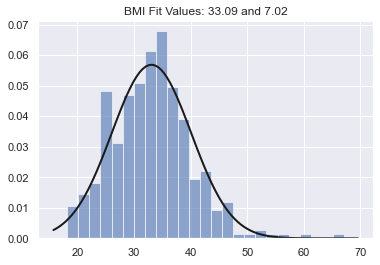

In [60]:
from scipy.stats import norm

# Fit a normal distribution to the BMI variable
mu, std = norm.fit(df['BMI'])

# Plot the histogram.
plt.hist(df['BMI'], bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "BMI Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()


The normal distribution assumes that the data is symmetrically distributed around the mean, with a bell-shaped curve. If the data is not symmetrical or does not have a bell-shaped curve, then the normal distribution may not be a good fit for the data. In this case, the log-normal distribution may be a better fit because it allows for asymmetry and can model data with a skewed distribution. The log-normal distribution is defined as the logarithm of a normally distributed random variable. This means that the log-normal distribution can model data that is skewed to the right or left, depending on the mean and standard deviation of the normal distribution that it is based on. If the data is skewed to the right, then the log-normal distribution will have a long right tail and a shorter left tail. If the data is skewed to the left, then the log-normal distribution will have a long left tail and a shorter right tail. This flexibility in the shape of the distribution allows the log-normal distribution to model data that does not fit well with the normal distribution.


### Hypothesis testing


We sought to investigate whether there were significant differences in the levels of Insulin, Glucose, and BMI between individuals with and without diabetes. To do this, we conducted hypothesis tests to compare the means of these variables between the two groups. We used t-tests to assess the statistical significance of the differences between the groups, with a p-value of less than 0.05 considered to be statistically significant."

In [61]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

insulin_outcome0 = df[df['Outcome'] == 0]['Insulin'].values
insulin_outcome1 = df[df['Outcome'] == 1]['Insulin'].values

# Conduct the t-test
t_statistic, p_value = ttest_ind(insulin_outcome0, insulin_outcome1)

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -6.243126964019698
p-value: 1.120794322841292e-09


This result shows that there is a significant difference in the mean insulin levels between the two groups (Outcome=0 and Outcome=1). The t-statistic is negative, which means that the mean insulin level for Outcome=0 is lower than the mean insulin level for Outcome=1. The p-value is very small, which indicates that the difference in the means is statistically significant, and not due to chance. Therefore, we can reject the null hypothesis that there is no significant difference in the mean insulin levels between the two groups, and conclude that there is a significant difference.

In [62]:
glucose_outcome0 = df[df['Outcome'] == 0]['Glucose'].values
glucose_outcome1 = df[df['Outcome'] == 1]['Glucose'].values

# Conduct the t-test
t_statistic, p_value = ttest_ind(glucose_outcome0, glucose_outcome1)

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -11.88690275607289
p-value: 5.0968747414453285e-28


The t-test is being used to test whether there is a significant difference in the mean of the Glucose levels between the two groups (Outcome=0 and Outcome=1). The t-statistic and p-value that are returned by the t-test are measures of the strength of the evidence against the null hypothesis, which is that there is no significant difference between the means of the two groups. A low p-value (usually less than 0.05) indicates that the null hypothesis can be rejected and that there is a significant difference between the means of the two groups. In this case, the p-value of 5.0968747414453285e-28 is very low, indicating that there is a significant difference in the mean Glucose levels between the two groups.

In [63]:
BMI_outcome0 = df[df['Outcome'] == 0]['BMI'].values
BMI_outcome1 = df[df['Outcome'] == 1]['BMI'].values

# Conduct the t-test
t_statistic, p_value = ttest_ind(BMI_outcome0, BMI_outcome1)

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -5.540362446544074
p-value: 5.563221106109045e-08


Based on the p-value of the t-test between the BMI of the two groups (outcome=0 and outcome=1), we can reject the null hypothesis that the means of the two groups are equal. The p-value is very small, which indicates that it is unlikely that the difference in means between the two groups occurred by chance. This suggests that there is a significant difference in the mean BMI between the two groups.

## Predictive analysis

In [141]:
# Machine Learning Modules
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression



# Plotting
import seaborn as sns
import matplotlib.pyplot as plt     

### Machine Learning Models

First, a general analysis of machine learning classifier performance with the dataset will be done, to then further evaluate two of them, GaussianNB and Logistic Regression.

These classifiers assume all features such as skin thickness and BMI to be independent

In [138]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=42)

classifiers = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = classifiers.fit(x_train, x_test, y_train, y_test)

100%|███████████████████████████████████████████| 29/29 [00:00<00:00, 50.81it/s]


In [139]:
models.sort_values('Accuracy',ascending =False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.80,0.77,0.77,0.80,0.08
CalibratedClassifierCV,0.78,0.74,0.74,0.78,0.04
SGDClassifier,0.78,0.72,0.72,0.77,0.01
LinearSVC,0.77,0.73,0.73,0.77,0.01
LogisticRegression,0.77,0.73,0.73,0.77,0.01
QuadraticDiscriminantAnalysis,0.77,0.73,0.73,0.77,0.00
Perceptron,0.76,0.78,0.78,0.77,0.00
AdaBoostClassifier,0.76,0.72,0.72,0.76,0.05
RidgeClassifierCV,0.76,0.71,0.71,0.75,0.01


All the above models assume an independence between the variables. With the given parameters this is not the case in reality, as several correleations are well known, such as the link between BMI and blood pressure. Despite this, the Machine Learning classifiers work surprisingly well, with Logistic Regression achieving 76% success rate and GaussianNB achieving 77%.

For medical tests, a specific metric is important, the false negative rate. This rate determines how many patients that have a disease get a result that says the opposite. The reason this is so critical, as patients with these results will potentially miss out on treatment until symptoms become worse and a second test ist done.

The so called confusion matrix for the well known GaussianNB and Logistic Regression will be evaluated in the following part.

### GaussianNB Classification

In [143]:
from IPython.display import Image

#### Mathematics and Parameters

The GaussianNB classifier relies on the Bayes Theorem which states the following equation:

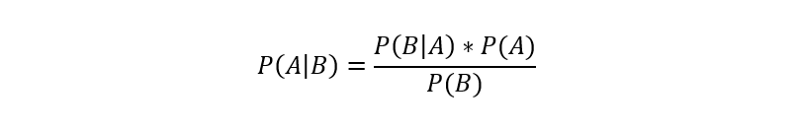

In [148]:
Image(filename='images/2.png') 

Rewritten using input variables and and output variable y, the equation represents the probability of the output given teh input features.

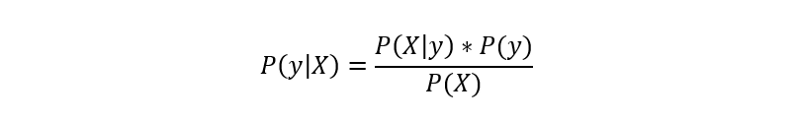

In [147]:
Image(filename='images/1.png') 

Given the assumption that all variables are independent, the probability can be rewritten as a product of all inputs. Finally, the class y with the highest probability is chosen.

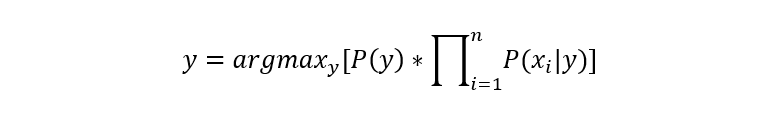

In [149]:
Image(filename='images/3.png') 

The parameters of the model are means and standard deviations for the maximum likelihood estimations of each feature in the data. The parameters are estimated by creating a probability distribution for the target variable, and then defininf a likleihood function that calculates the probability of an outcome based on the input data and model. Finally this function is optimized to find the set of parameters that maximizes the sum likelihood over the training dataset.

#### Classifying

In [111]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred=nb.predict(x_test)

conf=confusion_matrix(y_test,y_pred,labels=nb.classes_)

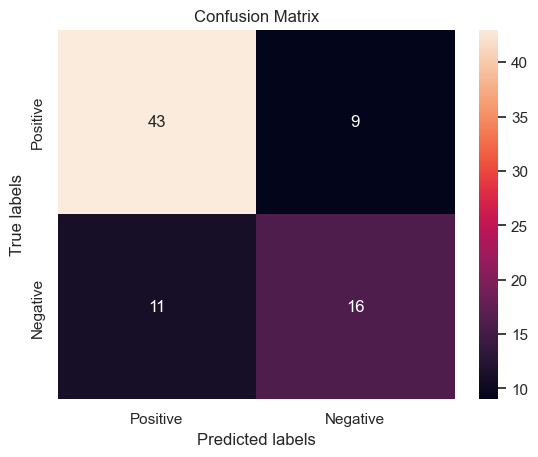

In [130]:
ax= plt.subplot()
sns.heatmap(conf, annot=True, fmt='g', ax=ax) 

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

plt.show()

As the confusion matrix above showcases, the classifier gives a false negative in 9 out of 79, so 11.4% of the cases. The same analysis will be done for Logistic Regression.

### Logistic Regression Classification

#### Mathematics and Parameters

The reason logistic regression is used, is that it is a suitable classifier for cases where the classes are 0 and 1, as showcased in the image below.

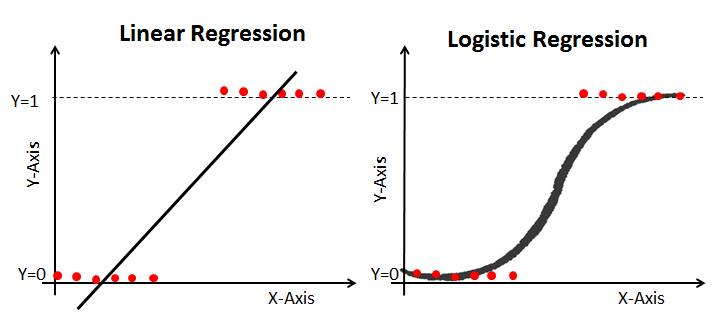

In [151]:
Image(filename='images/04.png') 

The logistic regression function showcased on the right in the above image relies on the sigmoid function described by the formula below.

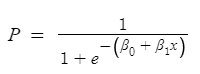

In [154]:
Image(filename='images/01.png') 

In order to classify input data, a cost function called log loss is used, and the values with the lowest loss correspond to the classifications with the highest probability.

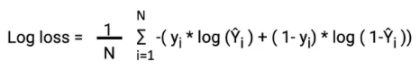

In [155]:
Image(filename='images/02.png') 

Again the parameters beta0 and beta1 seen in the sigmoid function above are to be estimated with maximum likelihood estimation.

#### Classifying

In [132]:
nb = LogisticRegression()
nb.fit(x_train, y_train)

y_pred=nb.predict(x_test)

conf2=confusion_matrix(y_test,y_pred,labels=nb.classes_)

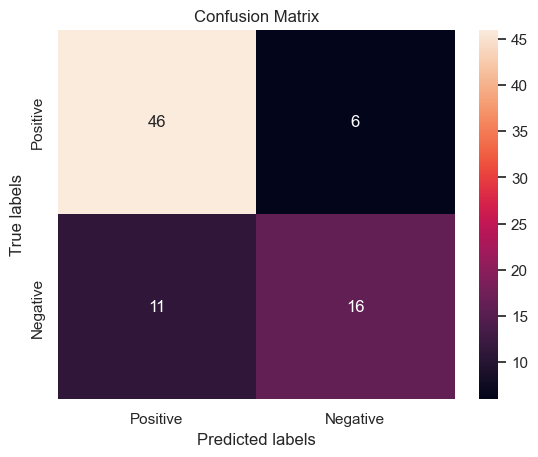

In [133]:
ax= plt.subplot()
sns.heatmap(conf2, annot=True, fmt='g', ax=ax) 

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

plt.show()

Sk-learn's Logistic Regression achieves a slightly better result at 6 out of 79, so 7.6% false negatives.

### Evaluation

Logistic Regression performs better than GaussianNB as expected, since Logistic Regression is best suited for cases where variables are classified as 1 or 0.

## Conclusion

In conclusion, in attempting to solve the personel crisis in the health care sector all over europe, we have implemented the GaussianNB and Logistic Regression classifiers to classify a data set of physiological data of patients. The GaussianNB classifier returned an 11.4% false negative rate, and the Logistic Regression classifier returned a 7.6% rate. These rates show a decent result, meaning that the classifiers could be used to give patients a ranking in which to be treated. Those that have been deemed as high risk of diabetes by the classifier would be treated first, whereas those with a low risk second.


We defined earlier that a good prediction is one that aids our judgment, and therefore has a success rate of higher than 50%. Our approaches have success rates of 76% and 77%, meaning that we would deem them as good predictions.

Limitations of our model include that it was trained on data with constraints on gender, age and heritage of patients, and that the two models relied on the assumption that all feautres of the data (BMI,blood pressure etc.) are independent.

# References

[1] https://doi.org/10.2337/dc20-S002

[2] https://www.frontiersin.org/articles/10.3389/fcvm.2022.858994/full